In [70]:
#Loading Library Pandas
import pandas as pd

#Defining the Iris Dataset - column names for the Pandas table
names =  ['sepal_length','sepal_width','petal_length','petal_width','class']

#Loading Training data
df = pd.read_csv("IrisDataSet.txt",header=None,names=names)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


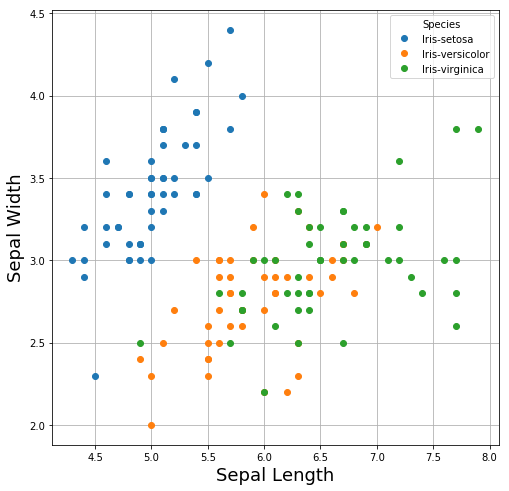

In [63]:
#Loading Matplot library to plot a scatter plot
import matplotlib.pyplot as plt
import numpy as np

#Plotting a scatter plot sepal_length vs sepal_width
df_x = np.array(df['sepal_length'].tolist())
df_y = np.array(df['sepal_width'].tolist())
labels = df['class'].tolist()
df = pd.DataFrame(dict(x=df_x, y=df_y, label=labels))

groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
ax.legend(title="Species")
ax.set_xlabel("Sepal Length",fontsize=18)
ax.set_ylabel("Sepal Width",fontsize=18)
plt.grid()
plt.show() 

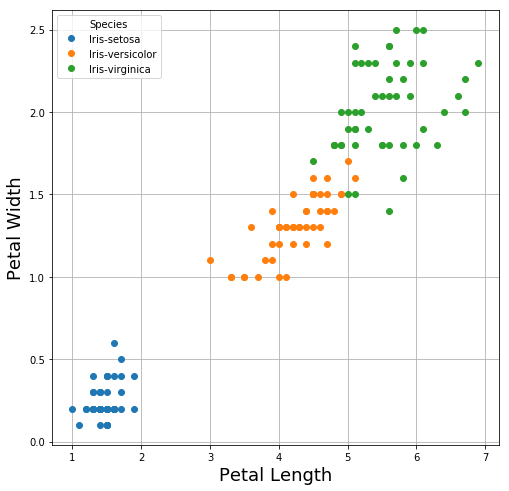

In [66]:
#Loading Matplot library to plot a scatter plot
import matplotlib.pyplot as plt
import numpy as np

#Plotting a scatter plot sepal_length vs sepal_width
df_x = np.array(df['petal_length'].tolist())
df_y = np.array(df['petal_width'].tolist())
labels = df['class'].tolist()
df = pd.DataFrame(dict(x=df_x, y=df_y, label=labels))

groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(8, 8))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=6, label=name)
ax.legend(title="Species")
ax.set_xlabel("Petal Length",fontsize=18)
ax.set_ylabel("Petal Width",fontsize=18)
plt.grid()
plt.show() 

In [99]:
# loading libraries
import numpy as np
from sklearn.cross_validation import train_test_split

# create design matrix X and target vector y
X = np.array(df.iloc[:, 0:4])  # end index is exclusive
y = np.array(df['class'])  # another way of indexing a pandas df

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [100]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors=3)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
pred = knn.predict(X_test)

# evaluate accuracy
print (accuracy_score(y_test, pred))

0.98


In [117]:
#K-Fold Cross-Validation
# creating odd list of K for KNN
from sklearn.model_selection import cross_val_score
myList = list(range(1,50))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold cv scores
cv_scores = []

# perform 10-fold cross validation
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 7


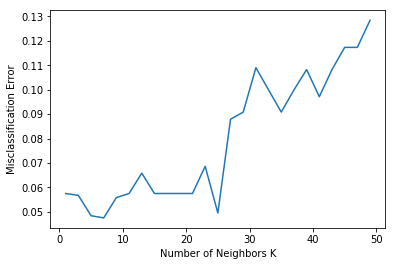

In [119]:
import numpy as np
import matplotlib.pyplot as plt

# changing to misclassification error
MSE = [1 - x for x in cv_scores]

# determining best k
min_index = MSE.index(min(MSE))

optimal_k = neighbors[min_index]
print ("The optimal number of neighbors is {0}".format(optimal_k))

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()